# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [1]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.8 MB 8.3 MB/s eta 0:00:02
     ------ --------------------------------- 2.1/12.8 MB 7.8 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 7.1 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 5.5 MB/s eta 0:00:02
     --------------- ------------------------ 5.0/12.8 MB 5.6 MB/s eta 0:00:02
     -------------------- ------------------- 6.6/12.8 MB 5.8 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 5.9 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.8 MB 5.9 MB/s eta 0:00:01
     ------------------------------- -------- 10.2/12.8 MB 6.0 MB/s eta 0:00:01
     ------------------------------------ --- 11.5/12.8 MB 6.0 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 6.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load 

## Importing the necessary libraries

In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations
from wordcloud import WordCloud

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [3]:
# Change the display properties of pandas to max
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 50)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [4]:
# Import the first file - True.csv
true_news = pd.read_csv('True.csv')

# Import the second file - Fake.csv
fake_news = pd.read_csv('Fake.csv')

print('True news imported', len(true_news))
print('Fake news imported', len(fake_news))

True news imported 21417
Fake news imported 23523


## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [5]:
# Inspect the DataFrame with True News to understand the given data
true_news.sample(1)

,title,text,date
10708,"U.N. welcomes Obama Guantanamo plan, but calls for due process","GENEVA (Reuters) - The top U.N. human rights official welcomed President Barack Obama’s plan announced on Tuesday to close the U.S. military prison at Guantanamo Bay, but stressed that no detainee should remain in indefinite custody without charge or trial. Zeid Ra’ad Al Hussein, U.N. High Commissioner for Human Rights, said the U.S. facility in Cuba had been a “serious blot on the human rights record, and reputation, of the United States for the past 14 years”. “All Guantanamo detainees sho...","February 23, 2016"


In [6]:
# Inspect the DataFrame with Fake News to understand the given data
fake_news.sample(1)

,title,text,date
12191,MI Election Recount Nightmare: “Write-In” Votes For Bernie In Detroit Were Being Counted As Votes For Hillary…And More,"Counting Bernie Sanders write-in votes for Clinton in Michigan. Any gains by Clinton are stolen votes. Mike Roman (@mikeroman) December 7, 2016Wayne County (Detroit) is counting write-in votes for Bernie as votes for Clinton! Trump team has to challenge them. pic.twitter.com/zAxemZFWMW Mike Roman (@mikeroman) December 7, 2016Another one. Lawyers trying to have this ballot counted as a vote for Clinton. #MichiganRecount #Corrupt pic.twitter.com/SV80Sao2qF Mike Roman (@mikeroman) December 7...","Dec 9, 2016"


In [7]:
# Print the column details for True News DataFrame
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [8]:
# Descriptive statistics of string lengths for True News
true_news.apply(lambda x: x.apply(lambda x: len(x))).describe().round(2)

,title,text,date
count,21417.00,21417.00,21417.00
mean,64.67,2383.28,16.72
std,9.17,1684.84,1.74
min,26.00,1.00,12.00
25%,59.00,914.00,16.00
50%,64.00,2222.00,17.00
75%,70.00,3237.00,18.00
max,133.00,29781.00,19.00


In [9]:
# Print the column details for Fake News Dataframe
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [10]:
# Descriptive statistics of string lengths for Fake News
fake_news.apply(lambda x: x.apply(lambda x: len(str(x)))).describe().round(2)

,title,text,date
count,23523.00,23523.00,23523.00
mean,94.15,2534.79,13.19
std,27.71,2409.69,5.23
min,3.00,1.00,3.00
25%,77.00,1426.00,12.00
50%,90.00,2164.00,12.00
75%,105.00,3029.00,14.00
max,480.00,32759.00,388.00


In [11]:
# Print the column names of both DataFrames
print('True news columns:', true_news.columns)
print('Fake news columns:', fake_news.columns)

True news columns: Index(['title', 'text', 'date'], dtype='object')
Fake news columns: Index(['title', 'text', 'date'], dtype='object')


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [12]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_news['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_news['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [13]:
# Combine the true and fake news DataFrames into a single DataFrame
news_data = pd.concat([true_news, fake_news], axis=0)

In [14]:
# Shuffling indices for better model training
idx = np.arange(len(news_data))
np.random.shuffle(idx)

news_data = news_data.iloc[idx, :]
news_data.reset_index(drop= True, inplace= True)

In [15]:
# Display the first 5 rows of the combined DataFrame to verify the result
news_data.head()

,title,text,date,news_label
0,Trump National Security Adviser Seriously Violated Federal Law; Should Be BANNED From Office,"One of the most controversial figures in the upcoming Trump administration (and this is out of a circus freak show of racist white men and corporate oligarchs) is General Michael T. Flynn, who s been slated to serve as Trump s national security adviser. Flynn, it seems, shared classified information.Flynn, like Donald Trump, seems to have an itchy trigger finger when it comes to computers. Last month, Flynn retweeted a fake news link that accused Hillary Clinton of engaging money laundering ...","December 14, 2016",0
1,A MUST WATCH! “HILLARY’S AMERICA” – TRAILER,WOW! What are the Democrats hiding? Watch the just-released trailer for Hillary s America: The Secret History Of The Democratic Party.,"May 14, 2016",0
2,Kremlin says U.S. closure of consulate fuels U.S.-Russia tensions,MOSCOW (Reuters) - The Kremlin said on Friday that a U.S. decision to close Russia’s San Francisco consulate and buildings in Washington and New York pushed bilateral ties further into a blind alley and fueled a spiral of tit-for-tat retaliatory measures. The United States on Thursday ordered Russia to close the facilities by Sept. 2 in retaliation for Moscow cutting the U.S. diplomatic presence in Russia. “The new steps push our bilateral relations even further into a dead end and contradic...,"September 1, 2017",1
3,‘SEEMS LIKE A THREAT’: ABC’s Raddatz Tries to Get Trump Adviser to Badmouth President Over WWE Tweet [Video],"ABC political hack Martha Raddatz tried to bait Homeland Security Adviser Thomas Bossert when she played the CNN WWE video and commented that it seems like a threat . Bossert didn t take the bait but praised President Trump for standing up to the media. Great job!NEW: Homeland Security Adviser Thomas Bossert on Trump s CNN tweet: No one would perceive that as a threat. I hope they don t. #ThisWeek pic.twitter.com/BfrWWt7buM This Week (@ThisWeekABC) July 2, 2017The DHS adviser responded: ...","Jul 3, 2017",0
4,Catalans occupy voting stations to defy Madrid's order to stop referendum,"BARCELONA (Reuters) - Supporters of Catalan independence began occupying polling stations on Friday, setting up a possible confrontation with police who have been ordered to clear them out by Sunday morning to ensure a referendum cannot go ahead. The central government, which has sent thousands of police reinforcements to stop people voting and has attempted to dismantle the infrastructure needed to conduct the referendum it says is illegal, insisted it would not go ahead. Catalan leader Car...","September 29, 2017",1


In [16]:
# Check for consistency of length
len(news_data) == len(true_news) + len(fake_news)

True

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [17]:
# Check Presence of Null Values
news_data.isnull().sum() / len(news_data) * 100

title         0.046729
text          0.046729
date          0.093458
news_label    0.000000
dtype: float64

Percent null value <1 hence such rows are dropped

In [18]:
# Handle Rows with Null Values
news_data.dropna(axis= 0, inplace=True)
news_data.isnull().sum()

title         0
text          0
date          0
news_label    0
dtype: int64

In [19]:
len(news_data)

44898

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [20]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
news_data['news_text'] = news_data['title'] + ' ' + news_data['text']

# Drop the irrelevant columns from the DataFrame as they are no longer needed
news_data.drop(['title', 'text', 'date'], axis= 1, inplace= True)

# Display the first 5 rows of the updated DataFrame to check the result
news_data.head()


,news_label,news_text
0,0,"Trump National Security Adviser Seriously Violated Federal Law; Should Be BANNED From Office One of the most controversial figures in the upcoming Trump administration (and this is out of a circus freak show of racist white men and corporate oligarchs) is General Michael T. Flynn, who s been slated to serve as Trump s national security adviser. Flynn, it seems, shared classified information.Flynn, like Donald Trump, seems to have an itchy trigger finger when it comes to computers. Last mont..."
1,0,A MUST WATCH! “HILLARY’S AMERICA” – TRAILER WOW! What are the Democrats hiding? Watch the just-released trailer for Hillary s America: The Secret History Of The Democratic Party.
2,1,Kremlin says U.S. closure of consulate fuels U.S.-Russia tensions MOSCOW (Reuters) - The Kremlin said on Friday that a U.S. decision to close Russia’s San Francisco consulate and buildings in Washington and New York pushed bilateral ties further into a blind alley and fueled a spiral of tit-for-tat retaliatory measures. The United States on Thursday ordered Russia to close the facilities by Sept. 2 in retaliation for Moscow cutting the U.S. diplomatic presence in Russia. “The new steps push ...
3,0,‘SEEMS LIKE A THREAT’: ABC’s Raddatz Tries to Get Trump Adviser to Badmouth President Over WWE Tweet [Video] ABC political hack Martha Raddatz tried to bait Homeland Security Adviser Thomas Bossert when she played the CNN WWE video and commented that it seems like a threat . Bossert didn t take the bait but praised President Trump for standing up to the media. Great job!NEW: Homeland Security Adviser Thomas Bossert on Trump s CNN tweet: No one would perceive that as a threat. I hope they d...
4,1,"Catalans occupy voting stations to defy Madrid's order to stop referendum BARCELONA (Reuters) - Supporters of Catalan independence began occupying polling stations on Friday, setting up a possible confrontation with police who have been ordered to clear them out by Sunday morning to ensure a referendum cannot go ahead. The central government, which has sent thousands of police reinforcements to stop people voting and has attempted to dismantle the infrastructure needed to conduct the referen..."


## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [21]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
df_clean = pd.DataFrame()

# Add 'news_label' column to the new dataframe for topic identification
df_clean['news_label'] = news_data['news_label'].copy()

df_clean.head()

,news_label
0,0
1,0
2,1
3,0
4,1


#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [22]:
def preprocess_text(text):

# Convert to lower case
    text = text.lower()

# Remove text in square bracket    
    text = re.sub(r'\[.*?\]', r'', text)    

# Shorten abbreviations
    shorten = lambda x: x.group().replace('.', '')
    text = re.sub(r"\b([a-z]\.)+[a-z]?\b\.?", shorten, text)

# Remove punctuations
    text = re.sub(r'[?.,!;:\-]', r' ', text)

# Remove quotation marks    
    text = re.sub(r'[“”‘’\'"]', r'', text)

# Remove text with numbers
    text = re.sub(r'.\d+.', r' ', text)

# Remove other special characters like $, #
    text = re.sub(r'[^a-zA-Z]+', r' ', text)

    text = text.strip()

    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [23]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['news_text'] = news_data['news_text'].progress_apply(lambda x: preprocess_text(x))

df_clean.head()

100%|██████████| 44898/44898 [00:06<00:00, 7129.75it/s]


,news_label,news_text
0,0,trump national security adviser seriously violated federal law should be banned from office one of the most controversial figures in the upcoming trump administration and this is out of a circus freak show of racist white men and corporate oligarchs is general michael t flynn who s been slated to serve as trump s national security adviser flynn it seems shared classified information flynn like donald trump seems to have an itchy trigger finger when it comes to computers last month flynn retw...
1,0,a must watch hillarys america trailer wow what are the democrats hiding watch the just released trailer for hillary s america the secret history of the democratic party
2,1,kremlin says us closure of consulate fuels us russia tensions moscow reuters the kremlin said on friday that a us decision to close russias san francisco consulate and buildings in washington and new york pushed bilateral ties further into a blind alley and fueled a spiral of tit for tat retaliatory measures the united states on thursday ordered russia to close the facilities by sept in retaliation for moscow cutting the us diplomatic presence in russia the new steps push our bilateral relat...
3,0,seems like a threat abcs raddatz tries to get trump adviser to badmouth president over wwe tweet abc political hack martha raddatz tried to bait homeland security adviser thomas bossert when she played the cnn wwe video and commented that it seems like a threat bossert didn t take the bait but praised president trump for standing up to the media great job new homeland security adviser thomas bossert on trump s cnn tweet no one would perceive that as a threat i hope they don t thisweek pic tw...
4,1,catalans occupy voting stations to defy madrids order to stop referendum barcelona reuters supporters of catalan independence began occupying polling stations on friday setting up a possible confrontation with police who have been ordered to clear them out by sunday morning to ensure a referendum cannot go ahead the central government which has sent thousands of police reinforcements to stop people voting and has attempted to dismantle the infrastructure needed to conduct the referendum it s...


### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [24]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
nlp_pos = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def word_filter(text):
    text = ' '.join([tok.lemma_ for tok in nlp_pos(text) 
                     if tok.tag_ in ['NN', 'NNS'] and tok.lemma_ not in stopwords.words('english')])
    
    return text

#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [25]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame
df_clean['news_text_lemmatized'] = df_clean['news_text'].progress_apply(lambda x: word_filter(str(x)))
df_clean.head()

100%|██████████| 44898/44898 [14:52<00:00, 50.29it/s]


,news_label,news_text,news_text_lemmatized
0,0,trump national security adviser seriously violated federal law should be banned from office one of the most controversial figures in the upcoming trump administration and this is out of a circus freak show of racist white men and corporate oligarchs is general michael t flynn who s been slated to serve as trump s national security adviser flynn it seems shared classified information flynn like donald trump seems to have an itchy trigger finger when it comes to computers last month flynn retw...,security adviser law office figure trump administration circus freak show man oligarch security adviser information flynn trigger finger computer month news link money laundering sex crime pizza joint course pizzagate gunman pizza place trump world image wayback machinejust year staff success presentation man woman imagine man authority woman criterion woman woman makeup makeup disguise foible revelation information officer investigation place information damage security detail security advi...
1,0,a must watch hillarys america trailer wow what are the democrats hiding watch the just released trailer for hillary s america the secret history of the democratic party,trailer history party
2,1,kremlin says us closure of consulate fuels us russia tensions moscow reuters the kremlin said on friday that a us decision to close russias san francisco consulate and buildings in washington and new york pushed bilateral ties further into a blind alley and fueled a spiral of tit for tat retaliatory measures the united states on thursday ordered russia to close the facilities by sept in retaliation for moscow cutting the us diplomatic presence in russia the new steps push our bilateral relat...,closure consulate fuel decision russia consulate building tie alley spiral tit tat retaliatory measure facility retaliation presence step relation end level announcement policy aide ushakov news briefing closure word readiness tension minister measure month staff half people number diplomat sanction
3,0,seems like a threat abcs raddatz tries to get trump adviser to badmouth president over wwe tweet abc political hack martha raddatz tried to bait homeland security adviser thomas bossert when she played the cnn wwe video and commented that it seems like a threat bossert didn t take the bait but praised president trump for standing up to the media great job new homeland security adviser thomas bossert on trump s cnn tweet no one would perceive that as a threat i hope they don t thisweek pic tw...,threat abc raddatz adviser president hack homeland security adviser bossert video threat bossert bait president trump medium job homeland security adviser one threat twitter com week adviser one threat way cable platform right president president politician president lifetime lot cable show hundred thousand viewer president president twitter medium platform people
4,1,catalans occupy voting stations to defy madrids order to stop referendum barcelona reuters supporters of catalan independence began occupying polling stations on friday setting up a possible confrontation with police who have been ordered to clear them out by sunday morning to ensure a referendum cannot go ahead the central government which has sent thousands of police reinforcements to stop people voting and has attempted to dismantle the infrastructure needed to conduct the referendum it s...,catalan voting station madrid order referendum barcelona supporter independence polling station confrontation police morning referendum government thousand police reinforcement people infrastructure referendum catalan leader reuter interview everything voting point ballot box voting slip everything people opinion band closing rally referendum campaign barcelona people slogan referendum democracy letter stage front crowd catalan flag people polling station order court order spirit barcelona s...


### Save the Cleaned data as a csv file (Recommended)

In [26]:
# Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [27]:
# Check the first few rows of the DataFrame
df_clean = pd.read_csv("clean_df.csv")
df_clean.head()

,news_label,news_text,news_text_lemmatized
0,0,trump national security adviser seriously violated federal law should be banned from office one of the most controversial figures in the upcoming trump administration and this is out of a circus freak show of racist white men and corporate oligarchs is general michael t flynn who s been slated to serve as trump s national security adviser flynn it seems shared classified information flynn like donald trump seems to have an itchy trigger finger when it comes to computers last month flynn retw...,security adviser law office figure trump administration circus freak show man oligarch security adviser information flynn trigger finger computer month news link money laundering sex crime pizza joint course pizzagate gunman pizza place trump world image wayback machinejust year staff success presentation man woman imagine man authority woman criterion woman woman makeup makeup disguise foible revelation information officer investigation place information damage security detail security advi...
1,0,a must watch hillarys america trailer wow what are the democrats hiding watch the just released trailer for hillary s america the secret history of the democratic party,trailer history party
2,1,kremlin says us closure of consulate fuels us russia tensions moscow reuters the kremlin said on friday that a us decision to close russias san francisco consulate and buildings in washington and new york pushed bilateral ties further into a blind alley and fueled a spiral of tit for tat retaliatory measures the united states on thursday ordered russia to close the facilities by sept in retaliation for moscow cutting the us diplomatic presence in russia the new steps push our bilateral relat...,closure consulate fuel decision russia consulate building tie alley spiral tit tat retaliatory measure facility retaliation presence step relation end level announcement policy aide ushakov news briefing closure word readiness tension minister measure month staff half people number diplomat sanction
3,0,seems like a threat abcs raddatz tries to get trump adviser to badmouth president over wwe tweet abc political hack martha raddatz tried to bait homeland security adviser thomas bossert when she played the cnn wwe video and commented that it seems like a threat bossert didn t take the bait but praised president trump for standing up to the media great job new homeland security adviser thomas bossert on trump s cnn tweet no one would perceive that as a threat i hope they don t thisweek pic tw...,threat abc raddatz adviser president hack homeland security adviser bossert video threat bossert bait president trump medium job homeland security adviser one threat twitter com week adviser one threat way cable platform right president president politician president lifetime lot cable show hundred thousand viewer president president twitter medium platform people
4,1,catalans occupy voting stations to defy madrids order to stop referendum barcelona reuters supporters of catalan independence began occupying polling stations on friday setting up a possible confrontation with police who have been ordered to clear them out by sunday morning to ensure a referendum cannot go ahead the central government which has sent thousands of police reinforcements to stop people voting and has attempted to dismantle the infrastructure needed to conduct the referendum it s...,catalan voting station madrid order referendum barcelona supporter independence polling station confrontation police morning referendum government thousand police reinforcement people infrastructure referendum catalan leader reuter interview everything voting point ballot box voting slip everything people opinion band closing rally referendum campaign barcelona people slogan referendum democracy letter stage front crowd catalan flag people polling station order court order spirit barcelona s...


In [28]:
# Check the dimensions of the DataFrame
df_clean.shape

(44898, 3)

In [29]:
# Check the number of non-null entries and data types of each column
df_clean.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    3
dtype: int64

In [30]:
df_clean.dropna(axis=0, inplace=True)
df_clean.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
dtype: int64

In [31]:
# Word counts descriptive statistics for each columns
df_clean[['news_text', 'news_text_lemmatized']].apply(lambda x: x.apply(lambda x: len(x.split()))).describe().round(2)

,news_text,news_text_lemmatized
count,44895.00,44895.00
mean,416.62,96.88
std,327.57,78.55
min,1.00,1.00
25%,216.00,50.00
50%,377.00,86.00
75%,529.00,123.00
max,5434.00,1401.00


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [32]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_clean, train_size=0.7, stratify=df_clean['news_label'], random_state= 11)

print('Train/test split shapes')
print(df_train.shape)
print(df_test.shape)

print('\nTrain/test split label proportions')
print(df_train['news_label'].value_counts(normalize= True))
print(df_test['news_label'].value_counts(normalize= True))

Train/test split shapes
(31426, 3)
(13469, 3)

Train/test split label proportions
news_label
0    0.522943
1    0.477057
Name: proportion, dtype: float64
news_label
0    0.522979
1    0.477021
Name: proportion, dtype: float64


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [33]:
# Check columns names
df_train.columns

Index(['news_label', 'news_text', 'news_text_lemmatized'], dtype='object')

In [34]:
# Add a new column to calculate the character length of cleaned news text
df_train['news_text_len'] = df_train['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_train['news_text_lemm_len'] = df_train['news_text_lemmatized'].apply(lambda x: len(x))

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

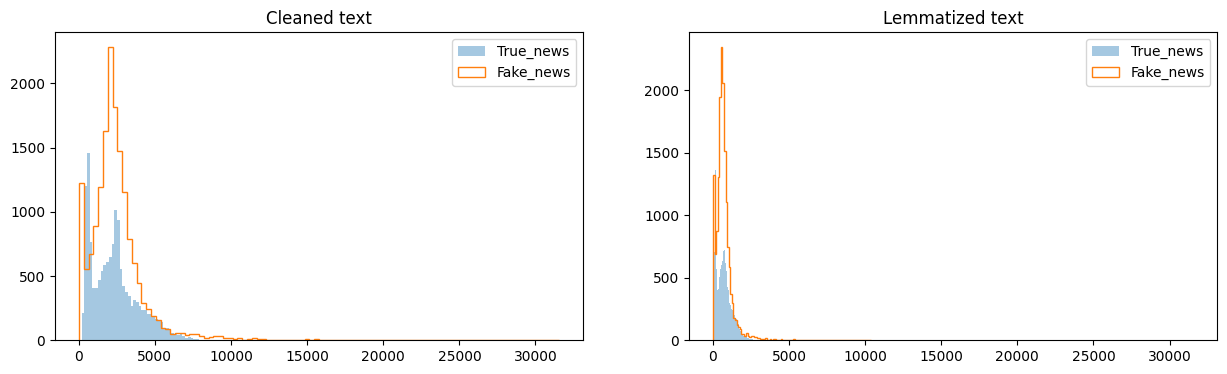

In [35]:
# Create a histogram plot to visualise character lengths
bins= 100
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.hist(df_train.loc[df_train['news_label']==1, col], 
            bins= bins, alpha= 0.4, label='True_news')

    ax.hist(df_train.loc[df_train['news_label']==0, col], 
            bins= bins, label='Fake_news', histtype= 'step')

    ax.set_title(f'{label}')
    ax.legend()
    
# Add histogram for lemmatized news text with POS tags removed



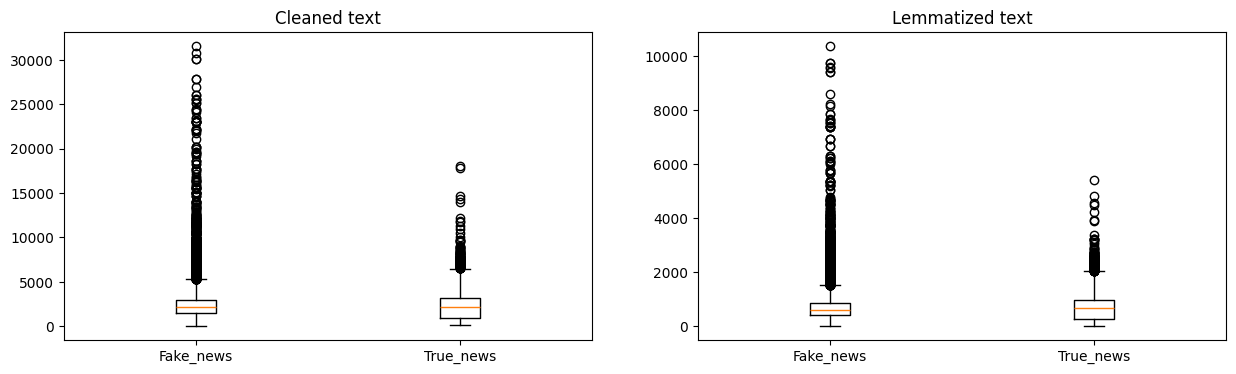

In [36]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.boxplot([df_train.loc[df_train['news_label']==val, col].values for val in [0, 1]])
    
    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    
    ax.set_title(f'{label}')
    
# Add histogram for lemmatized news text with POS tags removed

plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

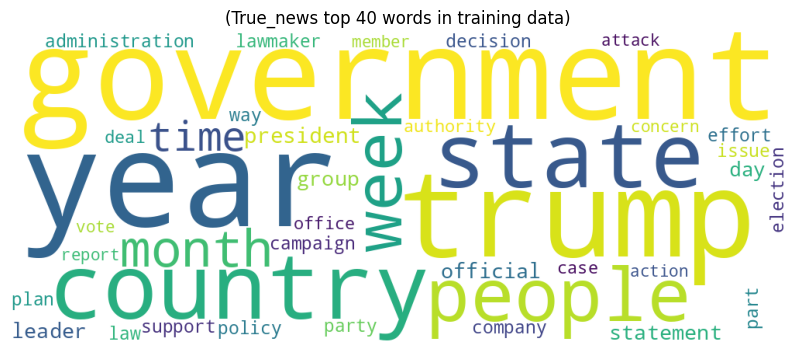

In [37]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
true_news = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color="white").generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis("off")
plt.title('(True_news top 40 words in training data)')
plt.show()

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

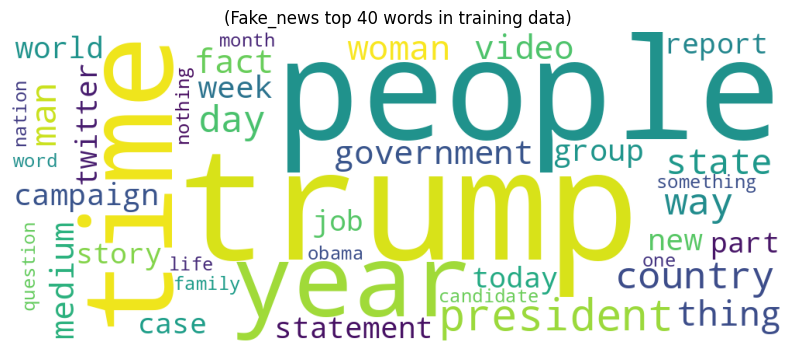

In [38]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
fake_news = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_fake = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation=None)
plt.axis("off")
plt.title('(Fake_news top 40 words in training data)')
plt.show()

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [39]:
# Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams= 1, topn=10):
    '''
    tx_list: List of texts
    ngrams: length of phrases (default 1)
    topn: how many top ngrams (default 10)
    '''
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0)).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

In [40]:
# Write function to get entity type counts
from sklearn.feature_extraction.text import CountVectorizer

def get_ent_counts(df_tx_col):
    '''
    df_tx_col: Text column of dataframe
    '''
    counts = CountVectorizer()
    ent_train = df_tx_col.progress_apply(lambda x: ' '.join([tok.ent_type_ for tok in nlp(x)]))
    count_train = counts.fit_transform(ent_train)
    return pd.DataFrame(count_train.toarray(), columns= counts.get_feature_names_out(), index= df_tx_col.index)

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [41]:
# Handle NaN values in the text data
df_train.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News (Train Data):
trump         21885
year          15883
state         15022
government    13918
people        10685
election      10397
country        9752
official       9122
party          7703
campaign       7643
dtype: int64


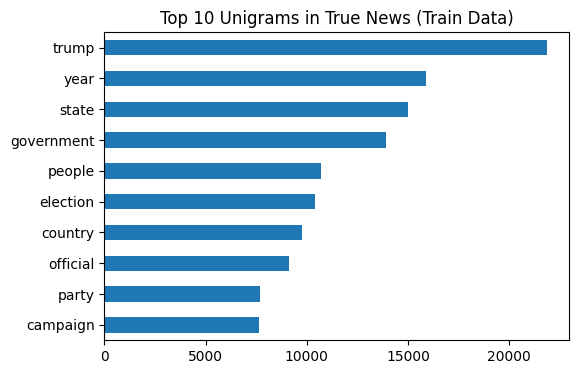

In [42]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in True News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Unigrams in True News (Train Data)")
plt.show()

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News (Train Data):
news conference         972
trump campaign          908
trump administration    829
percent percent         753
request comment         716
climate change          710
security force          696
tax reform              694
intelligence agency     607
attorney general        591
dtype: int64


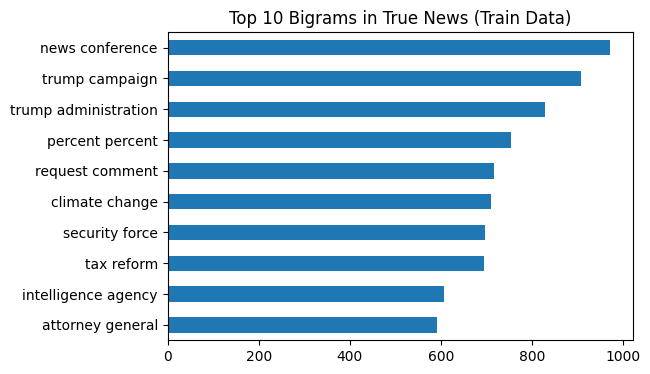

In [43]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in True News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Bigrams in True News (Train Data)")
plt.show()

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News (Train Data):
official condition anonymity       217
tax rate percent                   187
rate percent percent               133
state department official          131
staff involvement creation         123
involvement creation production    123
article part staff                 123
part staff involvement             123
percent percent percent            114
use email server                   104
dtype: int64


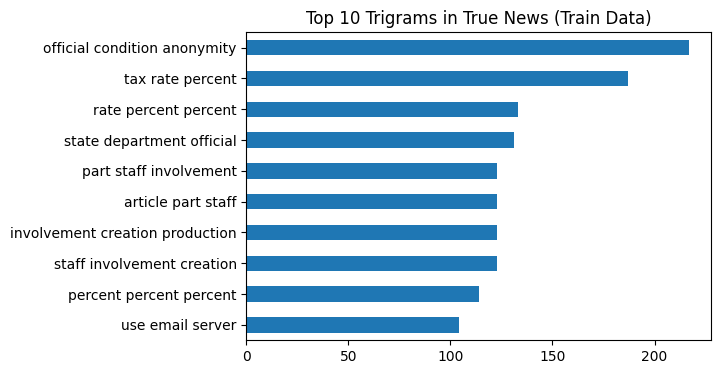

In [44]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in True News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Trigrams in True News (Train Data)")
plt.show()

In [45]:
# Get most common entity types for training data
ENT_train = get_ent_counts(df_train['news_text_lemmatized'])
ENT_train.head()

100%|██████████| 31426/31426 [03:37<00:00, 144.60it/s]


,cardinal,date,event,fac,gpe,...,person,product,quantity,time,work_of_art
37394,0,5,0,0,0,...,0,0,0,0,0
15219,0,1,0,0,0,...,0,0,0,0,0
33753,0,0,0,0,0,...,0,0,0,0,0
9272,0,0,0,2,0,...,2,0,0,0,0
16573,0,0,0,0,0,...,1,0,0,0,0


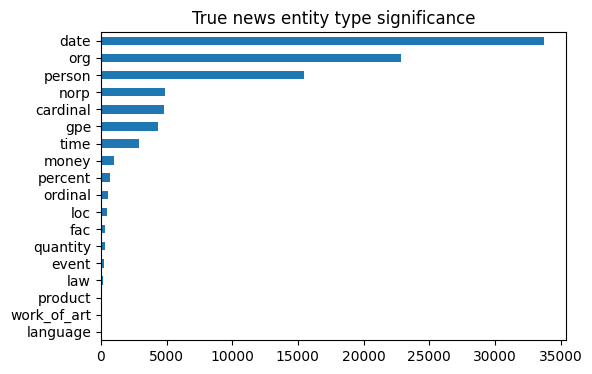

In [46]:
# Plot most common entity types for True news
ENT_true = ENT_train[df_train['news_label'] == 1].sum(axis= 0).sort_values()

plt.figure(figsize= (6, 4))
ENT_true.plot.barh(title='True news entity type significance')
plt.show()

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News (Train Data):
trump        37538
people       18712
year         13367
time         12018
president    10843
image        10259
state         9562
woman         8340
video         8338
country       8134
dtype: int64


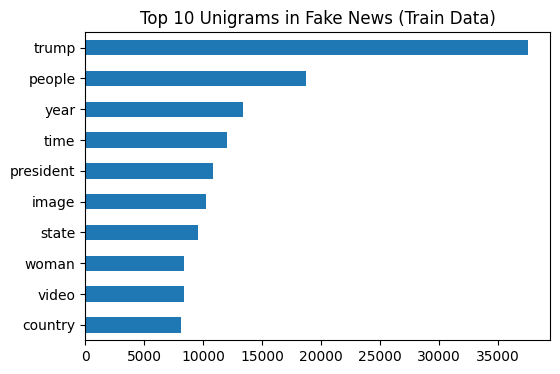

In [47]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in Fake News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Unigrams in Fake News (Train Data)")
plt.show()

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News (Train Data):
twitter com        2720
getty image        2352
pic twitter        2148
trump supporter    1593
century wire       1317
trump campaign     1260
police officer     1251
image getty        1197
law enforcement    1185
screen capture      960
dtype: int64


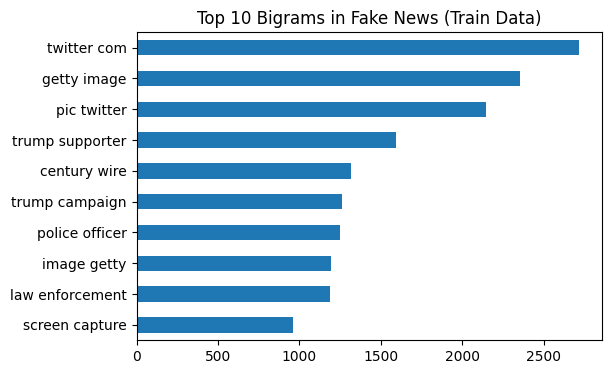

In [48]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in Fake News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Bigrams in Fake News (Train Data)")
plt.show()

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News (Train Data):
pic twitter com            1521
image getty image          1170
news century wire           596
member ire tv               532
video screen capture        525
image video screen          502
image screen capture        375
chip somodevilla getty      301
somodevilla getty image     296
youtube com watch           295
dtype: int64


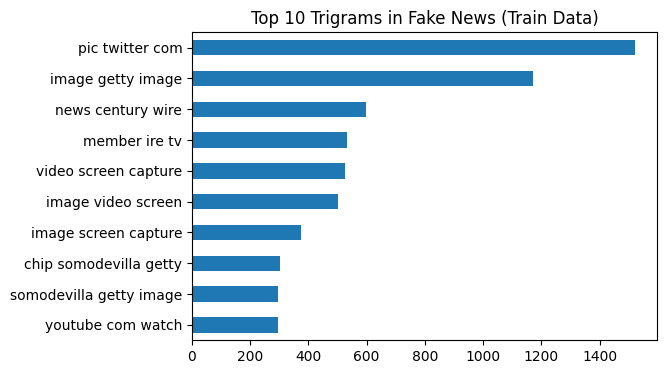

In [49]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_train.loc[df_train['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in Fake News (Train Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title= "Top 10 Trigrams in Fake News (Train Data)")
plt.show()

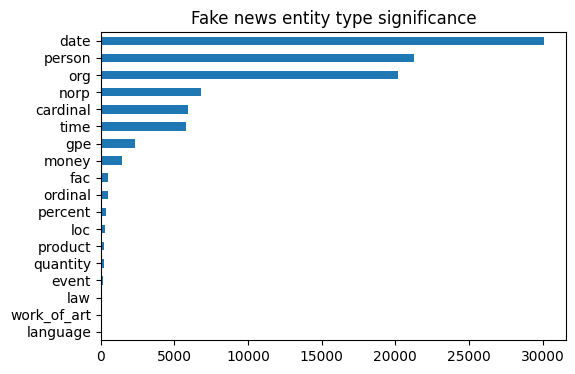

In [50]:
# Plot most common entity types for True news
ENT_fake = ENT_train[df_train['news_label'] == 0].sum(axis= 0).sort_values()

plt.figure(figsize= (6, 4))
ENT_fake.plot.barh(title='Fake news entity type significance')
plt.show()

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [51]:
# Check columns
df_test.columns

Index(['news_label', 'news_text', 'news_text_lemmatized'], dtype='object')

In [52]:
# Add a new column to calculate the character length of cleaned news text
df_test['news_text_len'] = df_test['news_text'].apply(lambda x: len(x))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed
df_test['news_text_lemm_len'] = df_test['news_text_lemmatized'].apply(lambda x: len(x))

##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

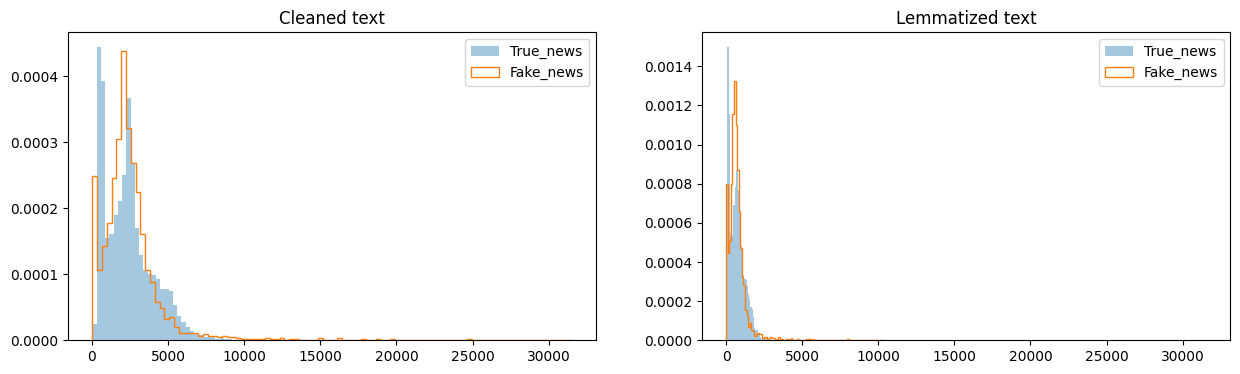

In [53]:
# Create a histogram plot to visualise character lengths
bins= 100
fig, axes = plt.subplots(nrows=1, ncols=2, sharex= True, figsize=(15, 4))

# Add histogram for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.hist(df_test.loc[df_test['news_label']==1, col], 
            bins= bins, density= True, alpha=0.4, label= 'True_news')
    
    ax.hist(df_test.loc[df_test['news_label']==0, col], 
            bins= bins, density= True, histtype='step', label= 'Fake_news')
    
    ax.set_title(f'{label}')
    ax.legend()

# Add histogram for lemmatized news text with POS tags removed


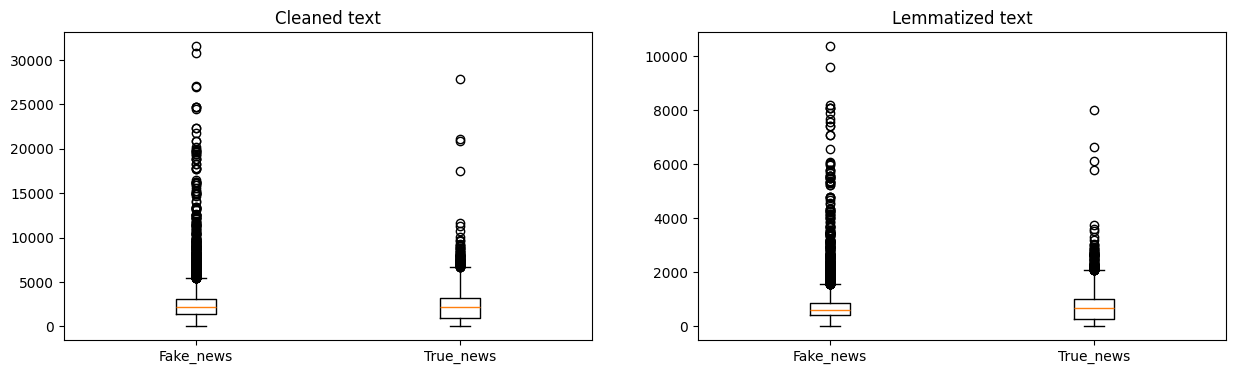

In [54]:
fig, axes = plt.subplots(1, 2, sharex= True, figsize=(15, 4))

plt.xticks()

# Add boxplot for cleaned news text
for ax, col, label in zip(axes, ['news_text_len', 'news_text_lemm_len'], ['Cleaned text', 'Lemmatized text']):
    
    ax.boxplot([df_test.loc[df_test['news_label']==val, col].values for val in [0, 1]])

    ax.set_xticks([1, 2], ['Fake_news', 'True_news'])
    
    ax.set_title(f'{label}')
    
# Add boxplot for lemmatized news text with POS tags removed

plt.show()

### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

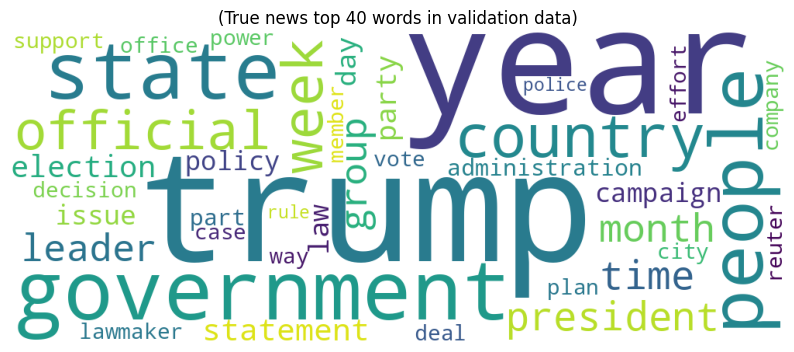

In [55]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text
true_news = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
true_string = ' '.join(true_news)

# Generate word cloud for True News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(true_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(True news top 40 words in validation data)')
plt.show()

##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

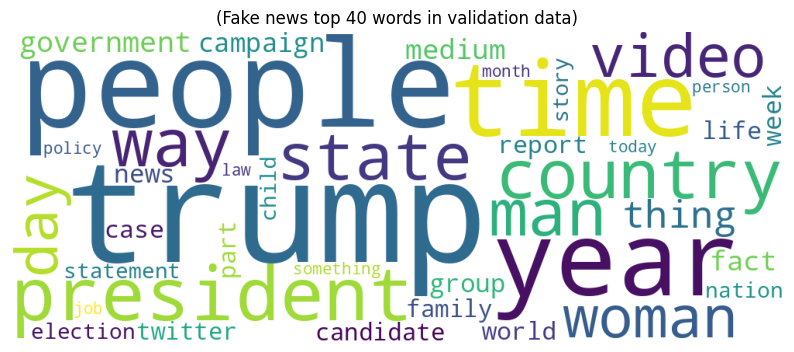

In [56]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text
fake_news = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
fake_string = ' '.join(fake_news)

# Generate word cloud for Fake News
wordcloud_true = WordCloud(width=1000, height=400, max_words=40, background_color='white').generate(fake_string)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation=None)
plt.axis('off')
plt.title('(Fake news top 40 words in validation data)')
plt.show()

### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [57]:
# Write a function to get the specified top n-grams
def get_ngrams(tx_list, ngrams= 1, topn=10):
    '''
    tx_list: List of texts
    ngrams: length of phrases (default 1)
    topn: how many top ngrams (default 10)
    '''
    count_vec = CountVectorizer(ngram_range=(ngrams, ngrams))
    model = count_vec.fit_transform(tx_list)
    word_freq = np.array(model.sum(axis=0)).reshape(-1)
    
    return pd.Series(word_freq, index= count_vec.get_feature_names_out()).sort_values(ascending= False).head(topn)

##### 5.3.2 Handle the NaN values

In [58]:
## First handle NaN values in the text data
df_test.isnull().sum()

news_label              0
news_text               0
news_text_lemmatized    0
news_text_len           0
news_text_lemm_len      0
dtype: int64

### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

Top 10 Unigrams in True News (Validation Data):
trump         9439
year          6986
state         6466
government    6265
election      4724
people        4678
official      4172
country       4069
campaign      3408
party         3383
dtype: int64


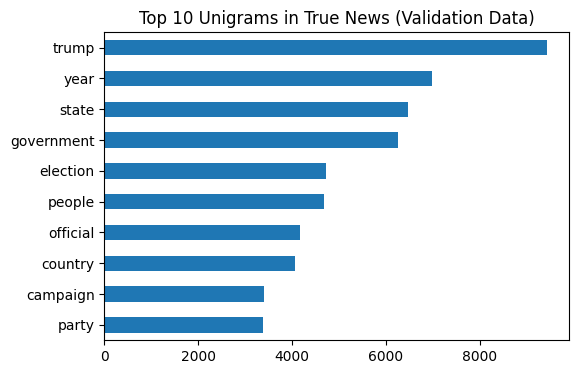

In [59]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in True News (Validation Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title="Top 10 Unigrams in True News (Validation Data)")
plt.show()

##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

Top 10 Bigrams in True News (Validation Data):
news conference         410
trump campaign          398
tax reform              333
request comment         320
climate change          320
trump administration    319
intelligence agency     314
security force          304
percent percent         262
right group             256
dtype: int64


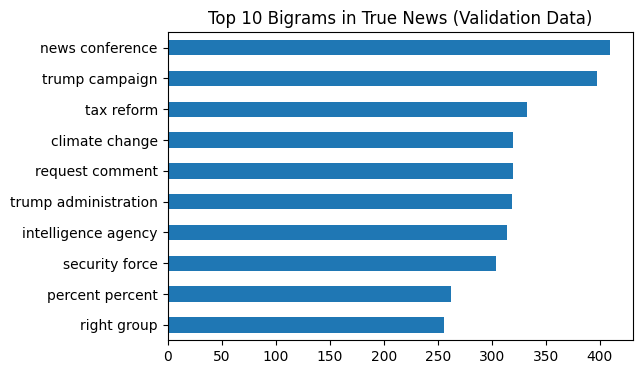

In [60]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in True News (Validation Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title="Top 10 Bigrams in True News (Validation Data)")
plt.show()

##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

Top 10 Trigrams in True News (Validation Data):
official condition anonymity       120
staff involvement creation          57
part staff involvement              57
involvement creation production     57
article part staff                  57
use email server                    54
tax rate percent                    50
state department official           44
trump transition team               40
care act obamacare                  38
dtype: int64


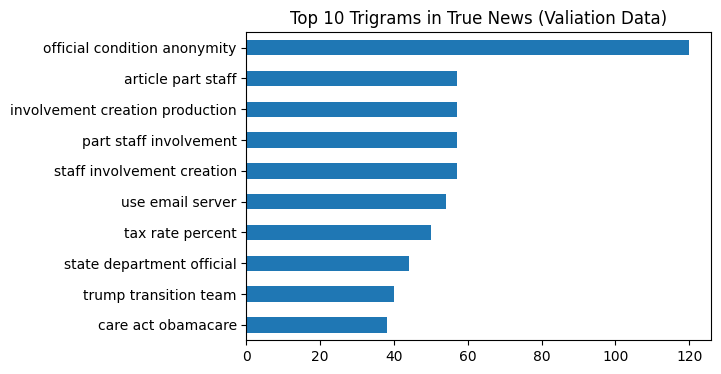

In [61]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==1, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in True News (Validation Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title="Top 10 Trigrams in True News (Valiation Data)")
plt.show()

### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

Top 10 Unigrams in Fake News (Validation Data):
trump        15527
people        8186
year          5912
time          5321
president     4592
image         4237
state         4175
video         3806
woman         3630
news          3474
dtype: int64


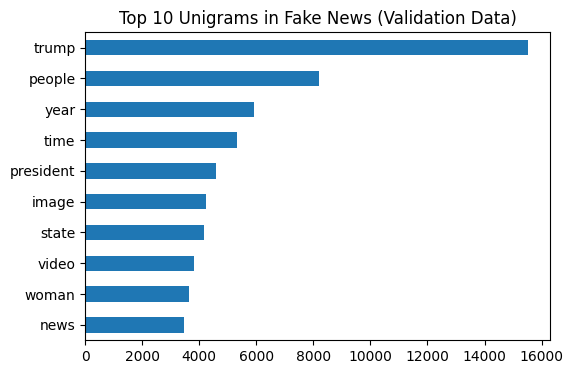

In [62]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 1)

print("Top 10 Unigrams in Fake News (Validation Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title="Top 10 Unigrams in Fake News (Validation Data)")
plt.show()

In [63]:
# Get entity counts for validation data
ENT_test = get_ent_counts(df_test['news_text_lemmatized'])
ENT_test.head()

100%|██████████| 13469/13469 [01:33<00:00, 144.06it/s]


,cardinal,date,event,fac,gpe,...,person,product,quantity,time,work_of_art
7441,0,0,0,0,0,...,0,0,0,0,0
10106,0,0,0,0,0,...,0,0,0,0,0
13368,0,4,0,0,0,...,5,0,0,0,0
13978,0,1,0,0,0,...,1,0,0,0,0
10163,0,0,0,0,0,...,0,0,0,0,0


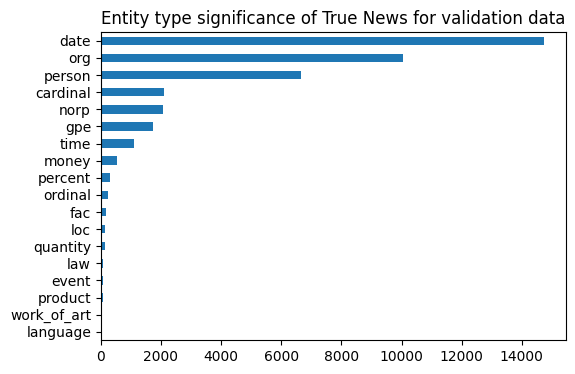

In [64]:
# Plot entity counts for true news for validation data
ENT_true = ENT_test[df_test['news_label'] == 1].sum(axis= 0).sort_values()

plt.figure(figsize= (6, 4))
ENT_true.plot.barh(title= 'Entity type significance of True News for validation data')
plt.show()

##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

Top 10 Bigrams in Fake News (Validation Data):
twitter com        1143
getty image        1021
pic twitter         891
trump supporter     663
century wire        549
image getty         532
police officer      514
trump campaign      510
law enforcement     489
donald trump        414
dtype: int64


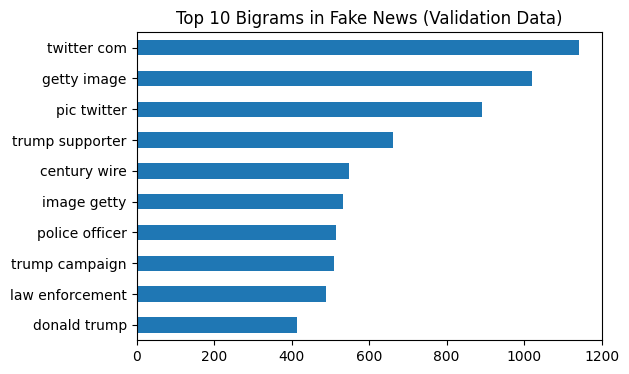

In [65]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label']==0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 2)

print("Top 10 Bigrams in Fake News (Validation Data):")
print(ngrams)

plt.figure(figsize= (6, 4))
ngrams.sort_values().plot.barh(title="Top 10 Bigrams in Fake News (Validation Data)")
plt.show()

##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

Top 10 Trigrams in Fake News (Validation Data):
pic twitter com            650
image getty image          519
news century wire          265
member ire tv              211
video screen capture       206
image video screen         198
image screen capture       159
somodevilla getty image    128
chip somodevilla getty     128
image chip somodevilla     109
dtype: int64


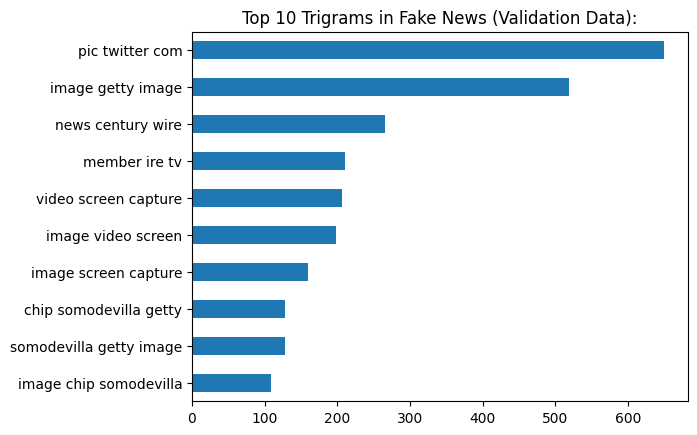

In [66]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tx_list = df_test.loc[df_test['news_label'] == 0, 'news_text_lemmatized']
ngrams = get_ngrams(tx_list, 3)

print("Top 10 Trigrams in Fake News (Validation Data):")
print(ngrams)

ngrams.sort_values().plot.barh(title= "Top 10 Trigrams in Fake News (Validation Data):")
plt.show()

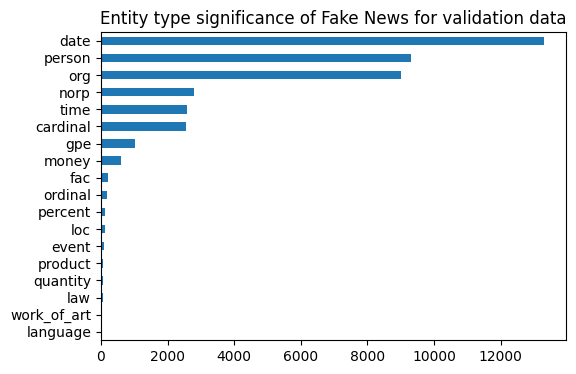

In [67]:
# Plot entity counts for fake news for validation data
ENT_fake = ENT_test[df_test['news_label'] == 0].sum(axis= 0).sort_values()

plt.figure(figsize= (6, 4))
ENT_fake.plot.barh(title= 'Entity type significance of Fake News for validation data')
plt.show()

## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [68]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
from gensim import downloader

g300_w2v = downloader.load('word2vec-google-news-300')

# Extract the raw vectors
vectors = g300_w2v.vectors  
print(vectors.shape)  


(3000000, 300)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [69]:
# Function to extract Frobenius norm of sentence word vectors
def mat_norm(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
              for word in text.split()])
    return np.linalg.norm(V)

In [70]:
# Function to extract word similarities from text
def word_dot(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) 
            for word in text.split()])
    Vsum = V.sum(axis=1)
    if np.all(Vsum == 0):
        return np.zeros(300)
    else:
        return np.dot(Vsum, V)

In [71]:
# Function to extract word distance vector from resultant word vector
def word_dist(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) for word in text.split()])
    Vsum = V.sum(axis= 0)
    if np.all(Vsum == 0):
        return np.zeros(300)
    else:
        return np.linalg.norm(V - Vsum, axis= 0) 

In [72]:
# Function to extract resultant word vector from text
def vec_sum_len(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) for word in text.split()]).sum(axis= 0)
    if np.all(V == 0):
        return 0
    else:
        return np.linalg.norm(V)

In [73]:
# Function to extract resultant word vector from text
def vec_sum(text):
    V = np.array([g300_w2v[word] if word in g300_w2v.key_to_index else np.zeros(300) for word in text.split()]).sum(axis= 0)
    return V

In [74]:
# Get word-vector of top unigram
def w2v_unigram(text):
    top_unigrams = get_ngrams([text], 1, 3).index.values
    for word in top_unigrams:
        if word in g300_w2v.key_to_index:
            return g300_w2v[word]
    else:
        return np.zeros(300)

In [75]:
# Get word-vector mean of top bigram
def w2v_bigram(text):
    t_len = len(text.split())
    if t_len < 2:
        return np.zeros(300)
    else:
        top_bigrams = get_ngrams([text], 2, 10).index.values
        for words in top_bigrams:
            word = words.split()
            if word[0] in g300_w2v.key_to_index and word[1] in g300_w2v.key_to_index:
                return (g300_w2v[word[0]] + g300_w2v[word[1]]) / 2
        else:
            return np.zeros(300)

In [76]:
# Get word-vector mean of top trigram
def w2v_trigram(text):
    t_len = len(text.split())
    if t_len < 3:
        return np.zeros(300)
    else:
        top_trigrams = get_ngrams([text], 3, 10).index.values
        for words in top_trigrams:
            word = words.split()
            if word[0] in g300_w2v.key_to_index and word[1] in g300_w2v.key_to_index and word[2] in g300_w2v.key_to_index:
                return (g300_w2v[word[0]] + g300_w2v[word[1]] + g300_w2v[word[2]]) / 3
        else:
            return np.zeros(300)

In [277]:
# Get word-vector of most important word
def w2v_mostImp(text, ntop_words= 1, ret_words= False):
    
    # Get word vectors
    tlist = [word for word in set(text.split()) if word in g300_w2v.key_to_index]   # only unique words
    V = np.array([g300_w2v[word] for word in tlist])

    if V.shape[0] == 0:         # no word found w2v model
        if not ret_words:
            return np.zeros(300)
        else:
            return ['']

    else:
        # Get lengths of word-vector differences
        diff_matrix = V[:, np.newaxis] - V
        dist_matrix = np.triu(np.linalg.norm(diff_matrix, axis=2))  # gives symetric matrix hence triangularized

        # Get sorted index-pairs on separation-distance in descending order
        indices = []
        for c in range(V.shape[0]):
            idx = np.unravel_index(dist_matrix.argmax(), dist_matrix.shape)
            dist_matrix[idx] = 0
            indices.append(idx)

        # Sort indices based on frequency of occurences in distance pairs
        indices_dict = {}
        for idx in indices:
            for i in range(2):
                d = {idx[i]: indices_dict.get(idx[i], 0)+1}
                indices_dict.update(d)
        indices_dict = sorted(indices_dict, key=lambda x: indices_dict[x], reverse= True)

        # Get most occuring word and word vector
        imp_idx = indices_dict[:ntop_words]
        imp_words = [tlist[idx] for idx in imp_idx]
        
        if not ret_words:
            return np.array([g300_w2v[word] for word in imp_words]).mean(axis= 0)
        else:
            return imp_words


In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

# Extract word lengths from lemmatized text
wlen_train = np.c_[df_train['news_text_lemmatized'].str.split().progress_apply(lambda x: len(x)).values]
wlen_test = np.c_[df_test['news_text_lemmatized'].str.split().progress_apply(lambda x: len(x)).values]

# Extract word repitition ratio
wrep_train = np.c_[df_train['news_text_lemmatized'].str.split().progress_apply(lambda x: len(x)/len(list(set(x)))).values]
wrep_test = np.c_[df_test['news_text_lemmatized'].str.split().progress_apply(lambda x: len(x)/len(list(set(x)))).values]

# Extract matrix norm of word vectors from lemmatized text
norm_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    norm_train.append(mat_norm(tx))
norm_train = np.c_[np.array(norm_train)]

norm_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    norm_test.append(mat_norm(tx))
norm_test = np.c_[np.array(norm_test)]

# Extract word similarities from lemmatized text
wsim_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    wsim_train.append(word_dot(tx))
wsim_train = np.array(wsim_train)

wsim_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    wsim_test.append(word_dot(tx))
wsim_test = np.array(wsim_test)

# Extract word distances from resultant from lemmatized text
wdist_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    wdist_train.append(word_dist(tx))
wdist_train = np.array(wdist_train)

wdist_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    wdist_test.append(word_dist(tx))
wdist_test = np.array(wdist_test)

# Extract length of resultant of word vectors from lemmatized text
reslen_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    reslen_train.append(vec_sum_len(tx))
reslen_train = np.c_[reslen_train]

reslen_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    reslen_test.append(vec_sum_len(tx))
reslen_test = np.c_[reslen_test]

# Extract resultant of word vectors from lemmatized text
res_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    res_train.append(vec_sum(tx))
res_train = np.array(res_train)

res_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    res_test.append(vec_sum(tx))
res_test = np.array(res_test)

# Extract word-vector of top unigram
uni_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    uni_train.append(w2v_unigram(tx))
uni_train = np.array(uni_train)

uni_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    uni_test.append(w2v_unigram(tx))
uni_test = np.array(uni_test)

# Extract mean of word-vector of top bigrams
bi_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    bi_train.append(w2v_bigram(tx))
bi_train = np.array(bi_train)

bi_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    bi_test.append(w2v_unigram(tx))
bi_test = np.array(bi_test)

# Extract mean of word-vector of top trigrams
tri_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    tri_train.append(w2v_trigram(tx))
tri_train = np.array(tri_train)

tri_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    tri_test.append(w2v_trigram(tx))
tri_test = np.array(tri_test)

# Extract most important word
imp_train = []
for tx in tqdm(df_train['news_text_lemmatized']):
    imp_train.append(w2v_mostImp(tx))
imp_train = np.array(imp_train)

imp_test = []
for tx in tqdm(df_test['news_text_lemmatized']):
    imp_test.append(w2v_mostImp(tx))
imp_test = np.array(imp_test)

## Extract the target variable for the training data and validation data
y_train = np.c_[df_train['news_label']]
y_test = np.c_[df_test['news_label']]


100%|██████████| 13469/13469 [00:37<00:00, 357.78it/s]


In [ ]:
# Collect extracted vectors to train model
X_train, X_test= [], []

X_train = np.hstack([
    wlen_train,
    wrep_train,
    norm_train,
    reslen_train,
    ENT_train.values,
    res_train,
    wsim_train,
    wdist_train,        
    uni_train,            
    # bi_train,         
    # tri_train,         
    # imp_train,      
    ])

X_test = np.hstack([
    wlen_test, 
    wrep_test,  
    norm_test, 
    reslen_test,
    ENT_test.values,
    res_test,
    wsim_test,
    wdist_test,
    uni_test,
    # bi_test,
    # tri_test, 
    # imp_test,
    ])

print(X_train.shape)
print(X_test.shape)

(31426, 1222)
(13469, 1222)


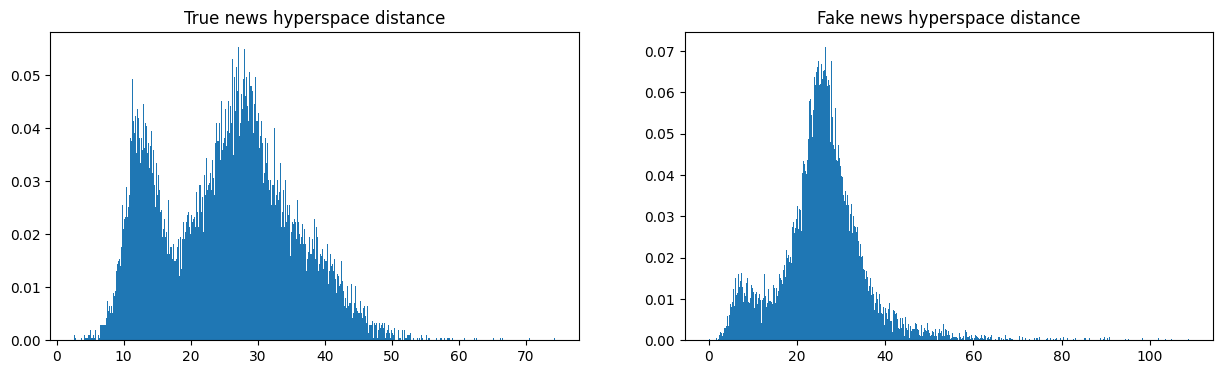

In [80]:
# Visualizing standardized sentence matrix norms for true and fake news
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1).hist(norm_train[df_train['news_label']==1], density= True, bins=500)
plt.title('True news hyperspace distance')

plt.subplot(1, 2, 2).hist(norm_train[df_train['news_label']==0], density= True, bins=500)
plt.title('Fake news hyperspace distance')

plt.show()

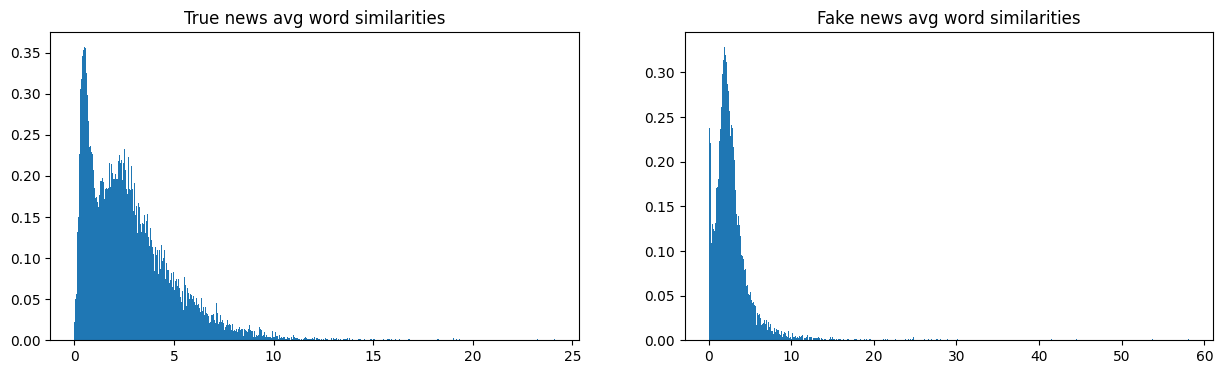

In [81]:
# # Visualizing avg of word similarities for true and fake news
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1).hist(wsim_train[df_train['news_label']==1].mean(axis=1), density= True, bins=500)
plt.title('True news avg word similarities')

plt.subplot(1, 2, 2).hist(wsim_train[df_train['news_label']==0].mean(axis=1), density= True, bins=500)
plt.title('Fake news avg word similarities')

plt.show()

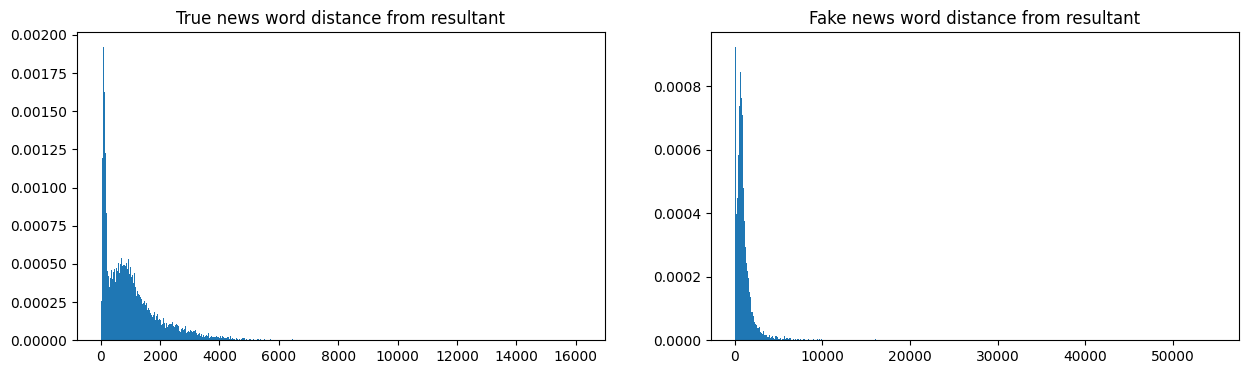

In [82]:
# Visualize average word distances from resultant word vector
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1).hist(np.linalg.norm(wdist_train[df_train['news_label']==1], axis=1), density= True, bins=500)
plt.title('True news word distance from resultant')

plt.subplot(1, 2, 2).hist(np.linalg.norm(wdist_train[df_train['news_label']==0], axis=1), density= True, bins=500)
plt.title('Fake news word distance from resultant')

plt.show()

In [203]:
# Distant word-pairs (sample text from training set)
idx = np.random.randint(0, len(df_train)+1)
top_pairs = 5
top_wrds = 2
text = df_train.iloc[idx, 2]
label = df_train.iloc[idx, 0]
tlist = [word for word in set(text.split()) if word in g300_w2v.key_to_index]
print('News label:', label)
pprint(text)
print()

# Get word vectors
V = np.array([g300_w2v[word] for word in tlist])

# Get lengths of word-vector differences
diff_matrix = V[:, np.newaxis] - V
dist_matrix_min = np.triu(np.linalg.norm(diff_matrix, axis=2))
dist_matrix_max = np.triu(np.linalg.norm(diff_matrix, axis=2))
max_val = np.max(dist_matrix_min)
dist_matrix_min = np.where(dist_matrix_min == 0, max_val, dist_matrix_min)

# Get sorted indices on lengths in descending order
indices_min = []
for c in range(top_pairs):
    idx = np.unravel_index(dist_matrix_min.argmin(), dist_matrix_min.shape)
    dist_matrix_min[idx] = max_val
    indices_min.append(idx)

indices_max = []
for c in range(top_pairs):
    idx = np.unravel_index(dist_matrix_max.argmax(), dist_matrix_max.shape)
    dist_matrix_max[idx] = 0
    indices_max.append(idx)

# Display word pairs
for indices, label in zip([indices_max, indices_min], ['Farthest', 'Closest']):
    word_pairs = [(tlist[idx[0]], tlist[idx[1]]) for idx in indices]
    print(f'{label} word pairs: ', word_pairs)
    w_imp = {}
    for words in word_pairs:
        for idx in range(2):
            d = {words[idx]: w_imp.get(words[idx], 0) + 1}
            w_imp.update(d)
    w_imp = sorted(w_imp, key= lambda x: w_imp[x], reverse= True)
    print(f'Most important word in {label}:', w_imp[:top_wrds])
    print()



News label: 0
('number union member collar billionaire million dollar union due coffer '
 'naught union member vote union member president poll trump support sander '
 'union donation candidate gateway pundittrump voter end friend job worker '
 'union voter union member position trade rejection politic vote rust belt '
 'battleground state election collar billionaire appeal voter organizing arm '
 'trump message worker class household trump fact candidate voter candidate '
 'time interview trump candidate worker sander trump support base democrat '
 'candidate preference majority respondent candidate personality position '
 'trade szczesny card member automobile aerospace implement worker vote trump '
 'primary president time candidate szczesny trump rally day week time book art '
 'deal trump vote guardian')

Farthest word pairs:  [('poll', 'rust'), ('aerospace', 'poll'), ('sander', 'poll'), ('rust', 'guardian'), ('poll', 'guardian')]
Most important word in Farthest: ['poll', 'rust']


In [ ]:
# Visualizing most important words of True News
top_word_true = df_train.loc[df_train['news_label'] == 1, 'news_text_lemmatized'].apply(lambda x: w2v_mostImp(x, ret_words=True)[0])
top_word_fake = df_train.loc[df_train['news_label'] == 0, 'news_text_lemmatized'].apply(lambda x: w2v_mostImp(x, ret_words=True)[0])


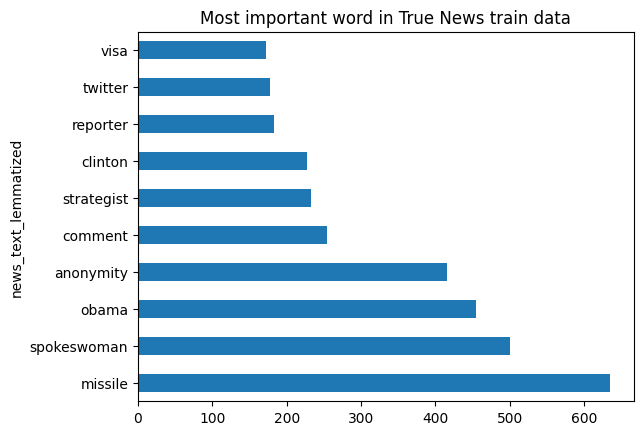

In [ ]:
top_word_true.value_counts().head(10).plot.barh(title= 'Most important words in True News train data')
plt.show()

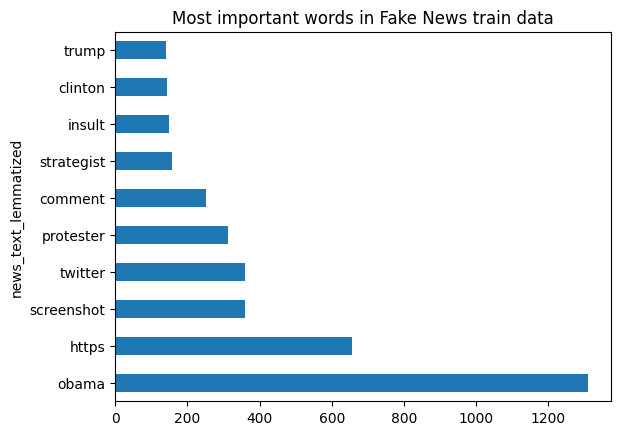

In [205]:
top_word_fake.value_counts().head(10).plot.barh(title= 'Most important words in Fake News train data')
plt.show()

## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [275]:
## Initialise Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', random_state= 22)
lr_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.01]
}

lr_grid = GridSearchCV(
    estimator= log_reg,
    param_grid= lr_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Logistic Regression model on training data
lr_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = lr_grid.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [270]:
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l1'}

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [276]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.9306
Precision: 0.9247
Recall: 0.9303
F1 score: 0.9275


In [272]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7044
           1       0.92      0.93      0.93      6425

    accuracy                           0.93     13469
   macro avg       0.93      0.93      0.93     13469
weighted avg       0.93      0.93      0.93     13469



In [273]:
print(confusion_matrix(y_test, y_test_pred))

[[6534  510]
 [ 457 5968]]


### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [93]:
## Initialise Decision Tree model
tree = DecisionTreeClassifier(criterion='entropy', random_state= 44)
dt_params = {
    'min_samples_split': [6, 7],
    'min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(
    estimator= tree,
    param_grid= dt_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Decision Tree model on training data
dt_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = dt_grid.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [94]:
dt_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 6}

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [95]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.8128
Precision: 0.8093
Recall: 0.7947
F1 score: 0.8019


In [96]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      7044
           1       0.81      0.79      0.80      6425

    accuracy                           0.81     13469
   macro avg       0.81      0.81      0.81     13469
weighted avg       0.81      0.81      0.81     13469



In [97]:
print(confusion_matrix(y_test, y_test_pred))

[[5841 1203]
 [1319 5106]]


### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [98]:
## Initialise Random Forest model
rf = RandomForestClassifier(n_estimators=200, bootstrap= True, oob_score= True, criterion='entropy', random_state= 66)
rf_params = {
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5]
}

rf_grid = GridSearchCV(
    estimator= rf,
    param_grid= rf_params,
    scoring= 'f1',
    cv= 4,
    verbose= 1,
    n_jobs= -1
)

## Train Random Forest model on training data
rf_grid.fit(X_train, y_train)

## Predict on validation data
y_test_pred = rf_grid.predict(X_test)

Fitting 4 folds for each of 4 candidates, totalling 16 fits


In [99]:
rf_grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 4}

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [100]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'Accuracy: {accuracy_score(y_test, y_test_pred):.4f}')
print(f'Precision: {precision_score(y_test, y_test_pred):.4f}')
print(f'Recall: {recall_score(y_test, y_test_pred):.4f}')
print(f'F1 score: {f1_score(y_test, y_test_pred):.4f}')

Accuracy: 0.9092
Precision: 0.9103
Recall: 0.8982
F1 score: 0.9042


In [101]:
# Classification Report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      7044
           1       0.91      0.90      0.90      6425

    accuracy                           0.91     13469
   macro avg       0.91      0.91      0.91     13469
weighted avg       0.91      0.91      0.91     13469



In [102]:
print(confusion_matrix(y_test, y_test_pred))

[[6475  569]
 [ 654 5771]]


## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

Assumptions:
- Sentence vector is assumed to be sum of all its word vectors. Vector sum summarizes each component of its constituent vectors. In sematic perspective, it is a singular representation of all the meaningful dimensions of its words.
- Sentence matrix is composed of all its word vectors. Frobenius norm of this matrix represents the volume of the matrix hyperspace. Larger the magnitude of its word vectors larger the volume. Semantically, larger volume represents more varied usage and conceptual significance. True news may have a more conceptually significant context.
- Word similarity is the dot product of the resultant along each dimension 
with the vector sum of all the words, taken across each dimension.
(resultant = word vectors (n_words x 300) sum axis = 1)
(dot product = resultant.T , word vectors (n_words x 300)) 
Semantically it represents how close each word is to the central meaning of the text. Thus, a high value of dot product indicates a more directed and purposeful context. Fake news may have a more purposeful context.
- Text lengths convey editing standards which is more significant in print media. Attempt has been made here to extend the same to digital media. High editing standards consider factors of readability like attention span, text volume first impression, distinction of key words etc. These influence text length. Fake news may lack such standards.
- Nouns in texts are typically used as subjects and objects of sentences and convey the semantic meaning of the context e.g. Elephant jungle may convey the context of elephant lives in a jungle. Thus, named entities attached to nouns also convey the theme of a text. True and fake news may display varying patterns and counts of named entities contained in them.

EDA findings:
1. Average word length of both true and fake news are similar. Both sets show double peaks, but the magnitude of peaks are opposite to the other. 
2. Spread of word lengths for fake news is more than true news. This shows lack of institutionalized editing standards in case of fake news. Thus word lenghts can be used as feature for model training.
3. The true news and fake news wordclouds and the respective entity type counts show that true news is more about geopolitical entities than persons. This shows that fake news target personalities more than actual facts. This characteristic can also be used for model training.
4. N-grams for fake news contain subject matters and sources while that of true news more about political persons and geopolitical entities. This indicates that fake news are directed more towards convincing the consumers that delivering facts. Fake news also contain for reference to images, videos and social media as proofs.
5. True news text matrix distance from null show two distinct groups while fake news show single group
6. Average word similarities and word distances follow the character count distribution of each news category to some extent. But both measures are more dispersed in case of true news. This indicates its varying nature of content.
7. Farthest word pairs carry more sematic theme of the text than closest word pairs. The few words which are repeate multiple times in the farthest word pairs bear the semantic theme of the text.

Approach to model building:
- Cleaning text by removing punctuations, numbers, special characters, quotation marks, texts in square brackets, NLTK stop-words and converting to lower case.
- Lemmatizing text by keeping only the NN, NNS tags because nouns carry the most of the semantic sense of a text (many verbs are generated from nouns as well like, I googled the meaning of the term).
- Creating word vectors by using word2vec-google-news-300 pre-trained model. It is a 300-dimension word vector-model of 3 million words
- Extracting number of words from text (scalar feature)
- Extracting number of words from text (scalar feature)
- Extracting counts of noun entity types from text (count vector)
- Extracting sentence vector as resultant of all its word-vectors (math vector)
- Extracting length of sentence vector (scalar)
- Extracting the matrix norm of the word-vector set of all words (scalar)
- Extracting dot product of each word vector with the sentence vector (math vector)
- Extracting length of vector difference between each word vector and sentence vector (math vector)
- Extracting word vector of top unigram of each news text (frequency vector)
- Extracting mean of word vectors of each word in top trigram of each news text (frequency vector)
- Extracting word vectors of the most important word of each text (frequency vector)
- Logistic Regression treated as the base simplest model with least hyper-parameters for tuning. F1 score is used for all models for best model tuning.
- Only scalar features (word counts, word repetitions, text matrix norm, and length of resultant vectors) are passed as input features.
- Base model performed little better than a random guesser with an accuracy of 58%.
- Adding count vector of entity types increased base model accuracy to 62%.
- Adding resultant of word vectors for texts increased model accuracy significantly to 90%.
- Adding other math vectors (word-similarity, word-distance) increased accuracy of base model to 92%.
- Then frequency vectors (unigram, bigram, trigram, most important word) were passed individually, two at a time and all together along with other features like scalars, count vector and math vectors to check for performance improvement.
- Decision Tree and Random Forest models are tuned using the GridSearchCV on the same input features for better results.

Evaluation metric: 
- F1 score is chosen as the best metric because it balances both precision and recall
- Since both target classes are more or less balanced, both precision and recall can be prioritised instead of only recall
- Mis-identifying true news as fake and fake news as true can be equally damaging to the reader

Impact
- Amongst all the frequency vectors (unigram, bigram, trigram, most important word) that are passed individually along with the scalars, count vectors and math vectors:
    - unigram frequency vector increased the prediction power of the base model the highest,
    - next came the trigram frequency vector in performance improvement. 
- While bigram and most important word frequency vector reduced prediction power.
- Using two frequency vectors also reduced the prediction power of the base model.
- Non usage of standardized features causes slower convergence but improves prediction power. 
- Adding more features like word similarities, word distance, noun entity count vector improve prediction power but increases feature extraction time.
- Adding more derived features increase multi-collinearity which adversely impacts logistic regression.

Best model: Logistic Regression (solver: liblinear, regularization: l1, penalty: 0.1). 
- Accuracy: 93.06%, Precision: 92.47%, Recall: 93.03%, F1 score: 92.75%
- It has better performance than DecisionTree.
- It has marginally better performance than Random Forest.
- Takes lesser time to train.
- Simple model sufficienct for binary classification.
- Has fewer hyper-parameters and hence low maintenance.
- Future data can be expected to have balanced classes because of plentiful true and fake news.
- But it is adversely affected by multi-collinearity, and inherent inflexibility due to lack of more hyper-parameters.